# Make a simplified plot with the global and annual mean radiative fluxes at the surface and TOA

There are radiative fluxes at TOA and the surface that are observed and modelled in CanAM.  This plot will summarize them using matplotlib to generate the graphs and compute the averages.

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as py
from cdo import *
import os

Function to making a plot with line for the TOA and filled rectangle for the surface

In [2]:
def plot_rad_data(obs_toa,
                  obs_sfc,
                  obs_atm_dn,
                  obs_toa_dn,
                  obs_sfc_dn,
                  model_toa,
                  model_sfc,
                  model_atm_dn,
                  model_toa_dn,
                  model_sfc_dn,
                  ax,
                  title):
    
    #py.axes()

    # draw the surface
    sfc = py.Rectangle((0,0), 10, 3, fill=False, ec="black", hatch="/")
    #ax.gca().add_patch(sfc)
    ax.add_patch(sfc)
    ax.set_ylim(0,65)
    ax.set_xlim(-1.1,11)
    
    # Draw the TOA, just a single line
    toa = py.Line2D((0,10),(40,40),color='black')
    #py.gca().add_line(toa)
    ax.add_line(toa)

    # Turn off the grids
    ax.axis('off')
    ax.grid(b=None)

    # Set the axes
    #ax=py.axes()
    
    # Add some text 
    ax.annotate("TOA", xy = (-1.1, 40))
    ax.annotate("Sfc", xy = (-1.1, 3))
    
    # Add a title
    ax.annotate(title, xy = (5.5, 65),ha='center')
    
    # Tweaks for arrows
    dx_a=0.3
    text='({0:.1f}) {1:.1f}'
    fontsize=8
    
    # Thermal fluxes
    arrow_color="r"

    ax.arrow(0.5,50,dx_a,-5, width=.1, head_width=0.4, head_length=5, fc=arrow_color, ec=arrow_color)
    ax.annotate(text.format(obs_toa[0],model_toa[0]), xy = (-0.1, 52),size=fontsize,color=arrow_color)

    ax.arrow(1.5,40,dx_a,5, width=.1, head_width=0.4, head_length=5, fc=arrow_color, ec=arrow_color)    
    ax.annotate(text.format(obs_toa[1],model_toa[1]), xy = (1.5,52),size=fontsize,color=arrow_color)

    ax.arrow(0.5,13,dx_a,-5, width=.1, head_width=0.4, head_length=5, fc=arrow_color, ec=arrow_color)
    ax.annotate(text.format(obs_sfc[0],model_sfc[0]), xy = (-0.5, 15),size=fontsize,color=arrow_color)

    ax.arrow(1.5,3,dx_a,5, width=.1, head_width=0.4, head_length=5, fc=arrow_color, ec=arrow_color)
    ax.annotate(text.format(obs_sfc[1],model_sfc[1]), xy = (1.5, 15),size=fontsize,color=arrow_color)

    ax.annotate(text.format(obs_atm_dn[0],model_atm_dn[0]), xy = (0.4,27),size=fontsize,color=arrow_color)

    ax.annotate('LW', xy = (1.0,58), color=arrow_color)

    # Solar fluxes
    arrow_color="b"

    ax.arrow(4.5,50,dx_a,-5, width=.1, head_width=0.4, head_length=5, fc=arrow_color, ec=arrow_color)
    ax.annotate(text.format(obs_toa[2],model_toa[2]), xy = (3.5, 52),size=fontsize,color=arrow_color)

    ax.arrow(5.5,40,dx_a,5, width=.1, head_width=0.4, head_length=5, fc=arrow_color, ec=arrow_color)
    ax.annotate(text.format(obs_toa[3],model_toa[3]), xy = (5.5, 52),size=fontsize,color=arrow_color)

    ax.arrow(4.5,13,dx_a,-5, width=.1, head_width=0.4, head_length=5, fc=arrow_color, ec=arrow_color)
    ax.annotate(text.format(obs_sfc[2],model_sfc[2]), xy = (3.5, 15),size=fontsize,color=arrow_color)

    ax.arrow(5.5,3,dx_a,5, width=.1, head_width=0.4, head_length=5, fc=arrow_color, ec=arrow_color)
    ax.annotate(text.format(obs_sfc[3],model_sfc[3]), xy = (5.5, 15),size=fontsize,color=arrow_color)

    ax.annotate(text.format(obs_atm_dn[1],model_atm_dn[1]), xy = (4.7,27),size=fontsize,color=arrow_color)
    
    ax.annotate('SW', xy = (5.0,58),color=arrow_color)
    
    # Solar+thermal fluxes
    arrow_color='k'

    ax.arrow(8.5,50,dx_a,-5, width=.1, head_width=0.4, head_length=5, fc=arrow_color, ec=arrow_color)
    ax.annotate(text.format(obs_toa[4],model_toa[4]), xy = (7.5, 52),size=fontsize,color=arrow_color)

    ax.arrow(9.5,40,dx_a,5, width=.1, head_width=0.4, head_length=5, fc=arrow_color, ec=arrow_color)
    ax.annotate(text.format(obs_toa[5],model_toa[5]), xy = (9.5, 52),size=fontsize,color=arrow_color)

    ax.arrow(8.5,13,dx_a,-5, width=.1, head_width=0.4, head_length=5, fc=arrow_color, ec=arrow_color)
    ax.annotate(text.format(obs_sfc[4],model_sfc[4]), xy = (7.5, 15),size=fontsize,color=arrow_color)

    ax.arrow(9.5,3,dx_a,5, width=.1, head_width=0.4, head_length=5, fc=arrow_color, ec=arrow_color)
    ax.annotate(text.format(obs_sfc[5],model_sfc[5]), xy = (9.5, 15),size=fontsize,color=arrow_color)

    ax.annotate(text.format(obs_atm_dn[2],model_atm_dn[2]), xy = (8.4,27),size=fontsize,color=arrow_color)
    
    ax.annotate('LW+SW', xy = (8.6,58),color=arrow_color)
    
    # Net flux at TOA and surface for LW+SW
    ax.annotate(text.format(obs_toa_dn[2],model_toa_dn[2]), xy = (10.2,40),size=fontsize)
    ax.annotate(text.format(obs_sfc_dn[2],model_sfc_dn[2]), xy = (10.2,3),size=fontsize)

Function to compute the required satellite data

In [3]:
def get_ebaf_obs(start_year,
                 end_year,
                 file_ebaf):
    
    # Get the observations and average them
    print("get_ebaf_obs")
    
    # Read in the observational data and compute the global means
    ofile="temp_file.nc"

    cdo.fldmean(input = file_ebaf, output=ofile) #returnXDataset = True)
    ds_glob_mean = xr.open_dataset(ofile)
    
    # Compute the time mean from start_year to end_year
    text1='{0}-01-01'
    text2='{0}-12-31'
    year1=text1.format(start_year)
    year2=text2.format(end_year)
    
    ds_glob_ann_mean = ds_glob_mean.sel(time=slice(year1, year2)).mean('time')
    
    # While it is better to have a XArray dataset, I don't want the plotting routine to
    # bother with specifics of the dataset, so put the scalar values the plot needs into
    # an array and return that.  This should make it easier to generate the plot using
    # different data sources.
    
    # Ordered as in plot, LW down, LW up, SW down, SW up, LW_SW down, LW_SW up
    flx_toa = np.zeros(6)
    flx_sfc = np.zeros(6)

    net_atm_dn = np.zeros(3)
    net_toa_dn = np.zeros(3)
    net_sfc_dn = np.zeros(3)
    
    flx_toa[0] = 0.0
    flx_toa[1] = ds_glob_ann_mean.toa_lw_all_mon.data
    flx_toa[2] = ds_glob_ann_mean.solar_mon.data
    flx_toa[3] = ds_glob_ann_mean.toa_sw_all_mon.data
    flx_toa[4] = flx_toa[0]+flx_toa[2]
    flx_toa[5] = flx_toa[1]+flx_toa[3]

    flx_sfc[0] = ds_glob_ann_mean.sfc_lw_down_all_mon.data
    flx_sfc[1] = ds_glob_ann_mean.sfc_lw_up_all_mon.data
    flx_sfc[2] = ds_glob_ann_mean.sfc_sw_down_all_mon.data
    flx_sfc[3] = ds_glob_ann_mean.sfc_sw_up_all_mon.data
    flx_sfc[4] = flx_sfc[0]+flx_sfc[2]
    flx_sfc[5] = flx_sfc[1]+flx_sfc[3]

    net_atm_dn[0] = (flx_toa[0]-flx_toa[1])-(flx_sfc[0]-flx_sfc[1])
    net_atm_dn[1] = (flx_toa[2]-flx_toa[3])-(flx_sfc[2]-flx_sfc[3])
    net_atm_dn[2] = (flx_toa[4]-flx_toa[5])-(flx_sfc[4]-flx_sfc[5])

    net_toa_dn[0] = (flx_toa[0]-flx_toa[1])
    net_toa_dn[1] = (flx_toa[2]-flx_toa[3])
    net_toa_dn[2] = (flx_toa[4]-flx_toa[5])

    net_sfc_dn[0] = (flx_sfc[0]-flx_sfc[1])
    net_sfc_dn[1] = (flx_sfc[2]-flx_sfc[3])
    net_sfc_dn[2] = (flx_sfc[4]-flx_sfc[5])

    # Cleanup the temporary files
    cmd="rm -f temp_file.nc"
    os.system(cmd)
    
    return flx_toa, flx_sfc, net_atm_dn, net_toa_dn, net_sfc_dn

Function to compute the required CanESM data

In [4]:
def get_model(start_year,
              end_year,
              file_model):
    
    # Get the model fields and average them
    print("get_model")

    # Read in the observational data and compute the global and time means
    ofile="temp_file.nc"
    cdo.fldmean(input = file_model, output=ofile) #returnXDataset = True)
    ds_glob_mean = xr.open_dataset(ofile)
    
    # Compute the time mean from start_year to end_year
    text1='{0}-01-01'
    text2='{0}-12-31'
    year1=text1.format(start_year)
    year2=text2.format(end_year)
    
    ds_glob_ann_mean = ds_glob_mean.sel(time=slice(year1, year2)).mean('time')
    
    # While it is better to have a XArray dataset, I don't want the plotting routine to
    # bother with specifics of the dataset, so put the scalar values the plot needs into
    # an array and return that.  This should make it easier to generate the plot using
    # different data sources.
    
    # Ordered as in plot, LW down, LW up, SW down, SW up, LW_SW down, LW_SW up
    flx_toa = np.zeros(6)
    flx_sfc = np.zeros(6)
    net_atm_dn = np.zeros(3)
    net_toa_dn = np.zeros(3)
    net_sfc_dn = np.zeros(3)
    
    flx_toa[0] = 0.0
    flx_toa[1] = ds_glob_ann_mean.rlut.data
    flx_toa[2] = ds_glob_ann_mean.rsdt.data
    flx_toa[3] = ds_glob_ann_mean.rsut.data
    flx_toa[4] = flx_toa[0]+flx_toa[2]
    flx_toa[5] = flx_toa[1]+flx_toa[3]

    flx_sfc[0] = ds_glob_ann_mean.rlds.data
    flx_sfc[1] = ds_glob_ann_mean.rlus.data
    flx_sfc[2] = ds_glob_ann_mean.rsds.data
    flx_sfc[3] = ds_glob_ann_mean.rsus.data
    flx_sfc[4] = flx_sfc[0]+flx_sfc[2]
    flx_sfc[5] = flx_sfc[1]+flx_sfc[3]
    
    net_atm_dn[0] = (flx_toa[0]-flx_toa[1])-(flx_sfc[0]-flx_sfc[1])
    net_atm_dn[1] = (flx_toa[2]-flx_toa[3])-(flx_sfc[2]-flx_sfc[3])
    net_atm_dn[2] = (flx_toa[4]-flx_toa[5])-(flx_sfc[4]-flx_sfc[5])

    net_toa_dn[0] = (flx_toa[0]-flx_toa[1])
    net_toa_dn[1] = (flx_toa[2]-flx_toa[3])
    net_toa_dn[2] = (flx_toa[4]-flx_toa[5])

    net_sfc_dn[0] = (flx_sfc[0]-flx_sfc[1])
    net_sfc_dn[1] = (flx_sfc[2]-flx_sfc[3])
    net_sfc_dn[2] = (flx_sfc[4]-flx_sfc[5])
    
    # Cleanup the temporary files
    cmd="rm -f temp_file.nc"
    os.system(cmd)

    return flx_toa, flx_sfc, net_atm_dn, net_toa_dn, net_sfc_dn    

### Compute the global and annual means from CERES EBAF products and CanESM, then generate plots with the information.

In [5]:
cdo = Cdo()

file_ebaf = "/space/hall5/sitestore/eccc/crd/ccrn/users/jcl001/PROJECTS/CanAM5_paper/obs-intake-esm/processed/CERES/CERES-EBAF_4.1_200301-201912.nc"
file_canesm5_amip = "/space/hall5/sitestore/eccc/crd/ccrn/users/jcl001/PROJECTS/CanAM5_paper/canam_data/radiation_all_sky_toa_sfc_CanESM5_amip.nc"
file_canesm2_amip = "/space/hall5/sitestore/eccc/crd/ccrn/users/jcl001/PROJECTS/CanAM5_paper/canam_data/radiation_all_sky_toa_sfc_CanESM2_amip.nc"
file_canesm5_his = "/space/hall5/sitestore/eccc/crd/ccrn/users/jcl001/PROJECTS/CanAM5_paper/canam_data/radiation_all_sky_toa_sfc_CanESM5_historical.nc"
file_canesm2_his = "/space/hall5/sitestore/eccc/crd/ccrn/users/jcl001/PROJECTS/CanAM5_paper/canam_data/radiation_all_sky_toa_sfc_CanESM2_historical.nc"

start_year=2003
end_year=2009

ebaf_toa, ebaf_sfc, ebaf_atm_dn, ebaf_toa_dn, ebaf_sfc_dn = get_ebaf_obs(start_year, 
                                                                         end_year,
                                                                         file_ebaf)

start_year=2003
end_year=2009

canesm5_amip_toa, canesm5_amip_sfc, canesm5_amip_atm_dn, canesm5_amip_toa_dn, canesm5_amip_sfc_dn = get_model(start_year, 
                                                                                                              end_year,
                                                                                                              file_canesm5_amip)

canesm2_amip_toa, canesm2_amip_sfc, canesm2_amip_atm_dn, canesm2_amip_toa_dn, canesm2_amip_sfc_dn = get_model(start_year, 
                                                                                                              end_year,
                                                                                                              file_canesm2_amip)

canesm5_his_toa, canesm5_his_sfc, canesm5_his_atm_dn, canesm5_his_toa_dn, canesm5_his_sfc_dn = get_model(start_year, 
                                                                                                         end_year,
                                                                                                         file_canesm5_his)

canesm2_his_toa, canesm2_his_sfc, canesm2_his_atm_dn, canesm2_his_toa_dn, canesm2_his_sfc_dn = get_model(start_year, 
                                                                                                         end_year,
                                                                                                         file_canesm2_his)


get_ebaf_obs
get_model
get_model
get_model
get_model


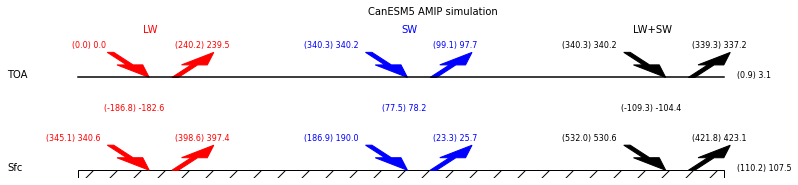

In [6]:
fig,ax1 = py.subplots(1,1,figsize=(14,3))

title='CanESM5 AMIP simulation'

plot_rad_data(ebaf_toa,
              ebaf_sfc,
              ebaf_atm_dn,
              ebaf_toa_dn,
              ebaf_sfc_dn,
              canesm5_amip_toa,
              canesm5_amip_sfc,
              canesm5_amip_atm_dn,
              canesm5_amip_toa_dn,
              canesm5_amip_sfc_dn,
              ax1, 
              title)

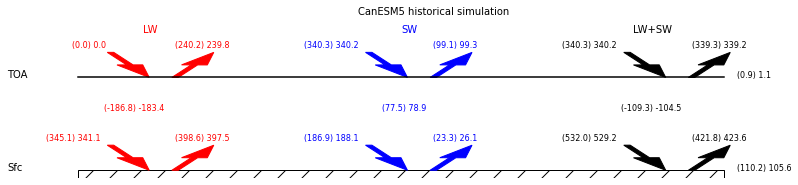

In [7]:
fig,ax1 = py.subplots(1,1,figsize=(14,3))

title='CanESM5 historical simulation'

plot_rad_data(ebaf_toa,
              ebaf_sfc,
              ebaf_atm_dn,
              ebaf_toa_dn,
              ebaf_sfc_dn,
              canesm5_his_toa,
              canesm5_his_sfc,
              canesm5_his_atm_dn,
              canesm5_his_toa_dn,
              canesm5_his_sfc_dn,
              ax1,
              title)

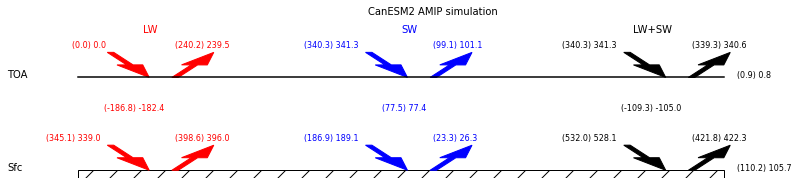

In [8]:
fig,ax1 = py.subplots(1,1,figsize=(14,3))

title='CanESM2 AMIP simulation'

plot_rad_data(ebaf_toa,
              ebaf_sfc,
              ebaf_atm_dn,
              ebaf_toa_dn,
              ebaf_sfc_dn,
              canesm2_amip_toa,
              canesm2_amip_sfc,
              canesm2_amip_atm_dn,
              canesm2_amip_toa_dn,
              canesm2_amip_sfc_dn,
              ax1,
              title)

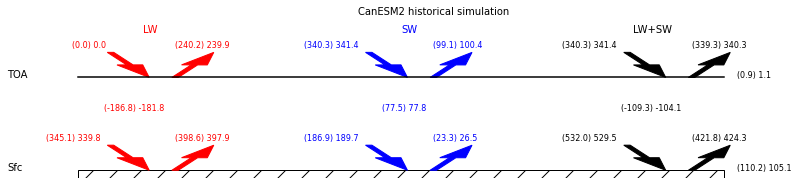

In [9]:
fig,ax1 = py.subplots(1,1,figsize=(14,3))

title='CanESM2 historical simulation'

plot_rad_data(ebaf_toa,
              ebaf_sfc,
              ebaf_atm_dn,
              ebaf_toa_dn,
              ebaf_sfc_dn,
              canesm2_his_toa,
              canesm2_his_sfc,
              canesm2_his_atm_dn,
              canesm2_his_toa_dn,
              canesm2_his_sfc_dn,
              ax1,
              title)

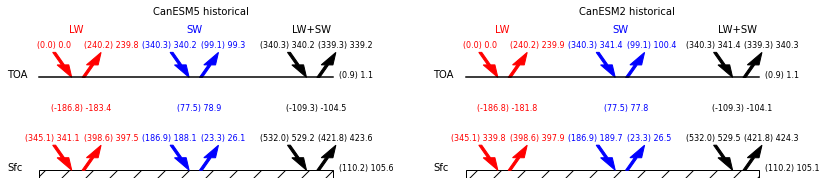

In [10]:
#fig= py.figure(figsize=(6,10))
fig,[ax1,ax2] = py.subplots(1,2,figsize=(14,3))

title='CanESM5 historical'
plot_rad_data(ebaf_toa,
              ebaf_sfc,
              ebaf_atm_dn,
              ebaf_toa_dn,
              ebaf_sfc_dn,
              canesm5_his_toa,
              canesm5_his_sfc,
              canesm5_his_atm_dn,
              canesm5_his_toa_dn,
              canesm5_his_sfc_dn,
              ax1,
              title)

title='CanESM2 historical'
plot_rad_data(ebaf_toa,
              ebaf_sfc,
              ebaf_atm_dn,
              ebaf_toa_dn,
              ebaf_sfc_dn,
              canesm2_his_toa,
              canesm2_his_sfc,
              canesm2_his_atm_dn,
              canesm2_his_toa_dn,
              canesm2_his_sfc_dn,
              ax2,
              title)



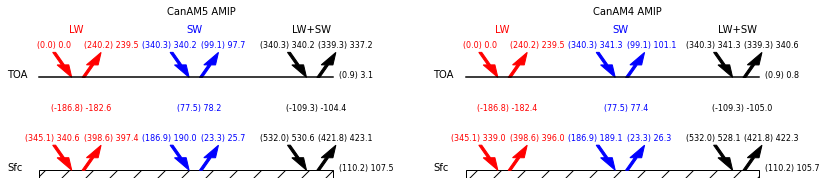

In [11]:
#fig= py.figure(figsize=(6,10))
fig,[ax1,ax2] = py.subplots(1,2,figsize=(14,3))

title='CanAM5 AMIP'
plot_rad_data(ebaf_toa,
              ebaf_sfc,
              ebaf_atm_dn,
              ebaf_toa_dn,
              ebaf_sfc_dn,
              canesm5_amip_toa,
              canesm5_amip_sfc,
              canesm5_amip_atm_dn,
              canesm5_amip_toa_dn,
              canesm5_amip_sfc_dn,
              ax1,
              title)

title='CanAM4 AMIP'
plot_rad_data(ebaf_toa,
              ebaf_sfc,
              ebaf_atm_dn,
              ebaf_toa_dn,
              ebaf_sfc_dn,
              canesm2_amip_toa,
              canesm2_amip_sfc,
              canesm2_amip_atm_dn,
              canesm2_amip_toa_dn,
              canesm2_amip_sfc_dn,
              ax2,
              title)

#py.savefig("Global_radiation_EBAF_CanESM2_CanESM5_v1.png")